In [91]:
import os
import librosa
from librosa import feature
import numpy as np
import librosa.display
import matplotlib.pyplot as plt
from matplotlib.pyplot import magma
from sympy import false

In [92]:
# Define source and destination paths
input_dir = '../data/preprocessed/not-gunshot'
output_dir = '../data/processed/not-gunshot'
file_prefix = 'not_gunshot_'

In [93]:
SAMPLE_RATE = 16000
FRAME_SIZE = 2048
HOP_SIZE = FRAME_SIZE // 4
SEGMENT_LENGTH = SAMPLE_RATE * 2
SEGMENT_HOP = SEGMENT_LENGTH // 2

In [166]:
test_path_1 = '../data/preprocessed/gunshot/gunshot_0.wav'
test_path_2 = '../data/preprocessed/gunshot/gunshot_1.wav'
test_path_3 = '../data/preprocessed/gunshot/gunshot_2.wav'
test_path_4 = '../data/preprocessed/not-gunshot/not_gunshot_0_0.wav'

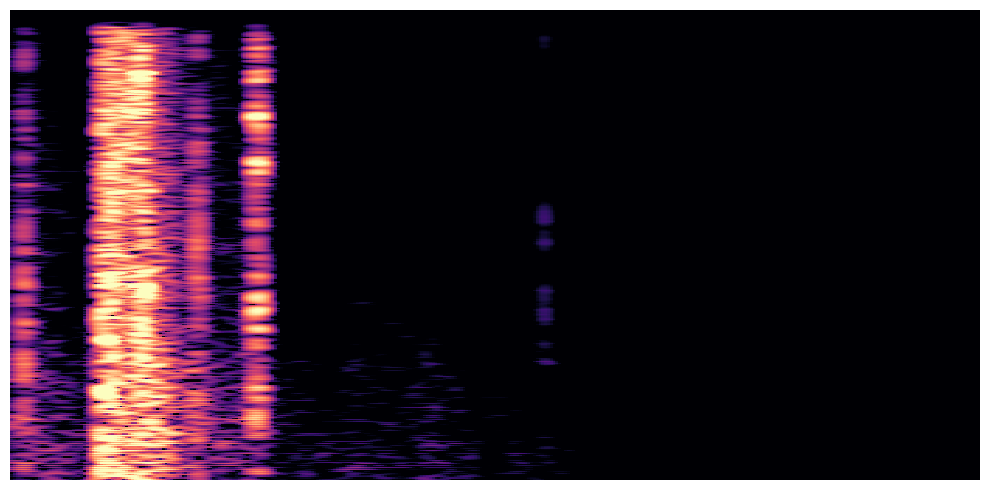

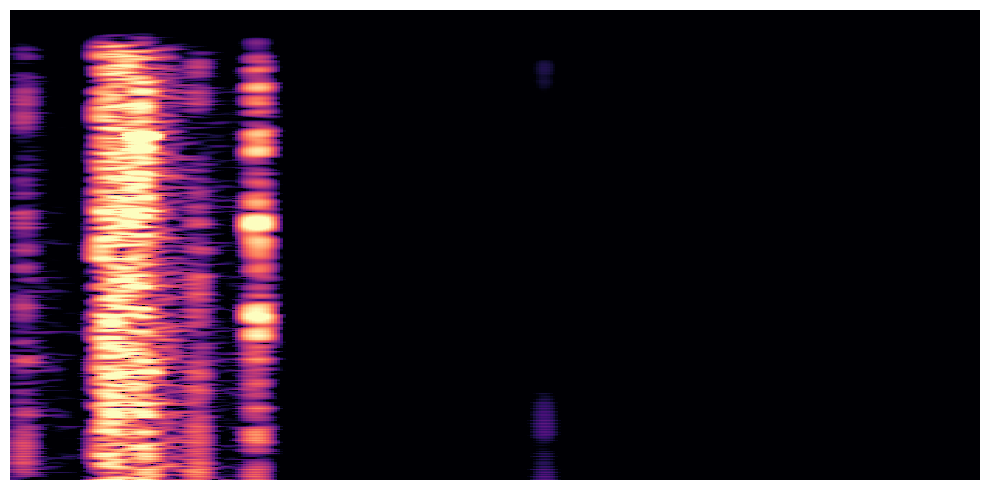

In [186]:
def mel_spectrogram_generator(path, n_fft = 2048, hop_length = 128, n_mels = 512, fmin = 2000, fmax = 16000 // 2):
    y, sr = librosa.load(path)

    y = librosa.util.normalize(y)

    S = librosa.feature.melspectrogram(
        y = y,
        sr = sr,
        n_fft = n_fft,
        hop_length = hop_length,
        n_mels = n_mels,
        fmin = fmin,
        fmax = fmax,
        power=2.0
    )

    S_dB = librosa.power_to_db(S)

    plt.figure(figsize=(10, 5))
    plt.axis('off')
    plt.tight_layout()

    librosa.display.specshow(
        S_dB,
        sr=sr,
        hop_length=hop_length,
        x_axis="time",
        y_axis="mel",
        fmin=fmin,
        fmax=fmax,
        vmin=-20,
        vmax=10,
        cmap = 'magma',
    )

mel_spectrogram_generator(test_path_1, n_fft = 2048, hop_length = 128, n_mels = 512, fmin = 2000, fmax = 16000 // 2)
mel_spectrogram_generator(test_path_1, n_fft = int(2048 * 1.25), hop_length = 128, n_mels = int(512), fmin = int(2000 * 2) , fmax = 16000 // 2)